In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import matplotlib.dates as mdates

In [2]:
# plot setting
plt.rcParams['font.family']='Arial'

bar_width=0.25
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=12)
plt.rc('figure', titlesize=12) 
# dateFmt = mdates.DateFormatter('%Y-%m-%d')
alphsize=12
alpha=0.4
padsize=15
set_dpi=400

# Vaccine Scenario

In [14]:
sc1 = pd.read_excel(r'vaccine_scenario.xlsx', sheet_name='sc1')
sc2 = pd.read_excel(r'vaccine_scenario.xlsx', sheet_name='sc2')
sc3 = pd.read_excel(r'vaccine_scenario.xlsx', sheet_name='sc3')

In [15]:
sc1['Date'] = pd.to_datetime(data['Date'])
sc2['Date'] = pd.to_datetime(data['Date'])
sc3['Date'] = pd.to_datetime(data['Date'])

In [16]:
def plot_scenario(sc, ax, colors, sc_name):
    var1 = str(sc_name)+'_70'
    var2 = str(sc_name)+'_50'
    var3 = str(sc_name)+'_30'
    ax.plot(sc['Date'], sc['no_vacc'].values,color='black',label='No vaccination')
    ax.plot(sc['Date'], sc[var1].values,color=colors[0],label='$\kappa$ = 70%')
    ax.plot(sc['Date'], sc[var2].values,color=colors[1],label='$\kappa$ = 50%')
    ax.plot(sc['Date'], sc[var3].values,color=colors[2],label='$\kappa$ = 30%')
    periods=pd.to_datetime(['2015-02-10','2015-02-24','2015-03-17'])
    for i, pn in enumerate(periods):
        ax.plot([pn,pn], [-5,400], alpha=1, color='black', linestyle=(4, (2, 2)),linewidth=1.5) # 선 그리기
    ax.set_ylim([-5,400])
    ax.set_xlim([pd.to_datetime('2015-01-01'), pd.to_datetime('2015-06-12')])
    ax.set_xticks(pd.to_datetime(['2015-01-01','2015-02-10','2015-02-24','2015-03-17','2015-06-12']))
    # ax.set_ylabel('The number of cases', fontweight='bold')
    # ax.set_xlabel('Date', fontweight='bold')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d'))

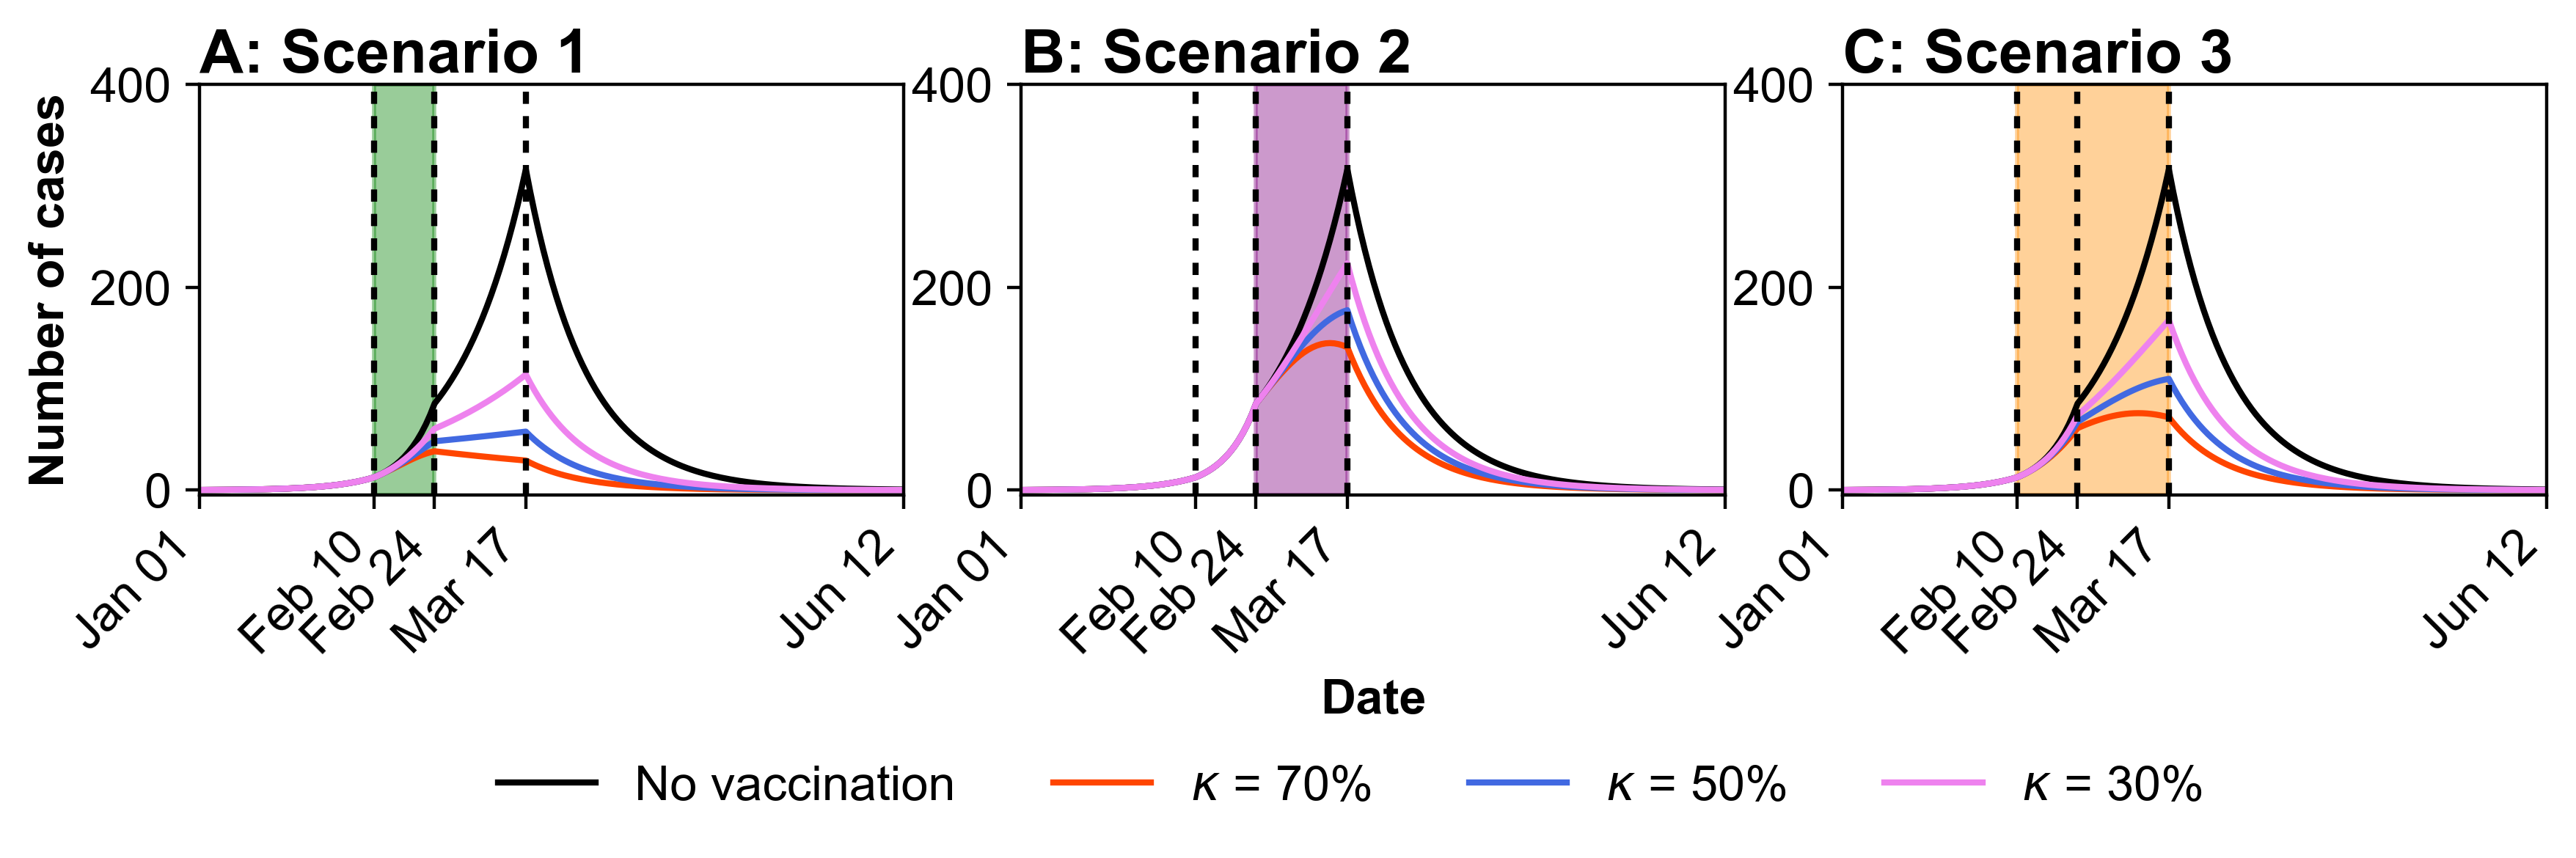

In [18]:
fig=plt.figure(figsize=(8,4), dpi=set_dpi)

colors = ['orangered','royalblue','violet']
sc_colors = ['green','purple','darkorange']

# Line 1 (A, B, C)
ys1_1=fig.add_gridspec(nrows=1,ncols=1,top=1, bottom=0.65,left=0, right=0.3)
ys1_2=fig.add_gridspec(nrows=1,ncols=1,top=1, bottom=0.65,left=0.35, right=0.65)
ys1_3=fig.add_gridspec(nrows=1,ncols=1,top=1, bottom=0.65,left=0.7, right = 1)

# A
axA=fig.add_subplot(ys1_1[0,0])
plot_scenario(sc1, axA, colors, 'sc1')
axA.text(0, 1.03, '{}: Scenario 1'.format(string.ascii_uppercase[0]), transform=axA.transAxes, weight='bold', size=15)
axA.fill_between(x=[pd.to_datetime('2015-02-10'), pd.to_datetime('2015-02-24')], y1=[-5, -5], y2=[400, 400], color=sc_colors[0], alpha=alpha)
axA.set_ylabel('Number of cases', fontweight='bold')
axA.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# B
axB=fig.add_subplot(ys1_2[0,0])
plot_scenario(sc2, axB, colors, 'sc2')
axB.text(0, 1.03, '{}: Scenario 2'.format(string.ascii_uppercase[1]), transform=axB.transAxes, weight='bold', size=15)
axB.fill_between(x=[pd.to_datetime('2015-02-24'), pd.to_datetime('2015-03-17')], y1=[-5, -5], y2=[400, 400], color=sc_colors[1], alpha=alpha)
axB.set_xlabel('Date', fontweight='bold')
axB.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# C
axC=fig.add_subplot(ys1_3[0,0])
plot_scenario(sc3, axC, colors, 'sc3')
axC.text(0, 1.03, '{}: Scenario 3'.format(string.ascii_uppercase[2]), transform=axC.transAxes, weight='bold', size=15)
axC.fill_between(x=[pd.to_datetime('2015-02-10'), pd.to_datetime('2015-03-17')], y1=[-5, -5], y2=[400, 400], color=sc_colors[2], alpha=alpha)
axC.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
axC.legend(ncols=4,loc='upper center', bbox_to_anchor=(-0.7, -0.55), frameon=False)

# Line 2 (D)
ys2_1=fig.add_gridspec(nrows=1,ncols=1,top=0.35,bottom=0, left=0, right=1)

# D
# axD=fig.add_subplot(ys2_1[0,0])
# RR.plot.bar(ax=axD, color = sc_colors)
# ax.set_ylabel('Reduction rate (%)', fontweight='bold', size=alphsize)
# ax.set_xlabel('Vaccine coverage (%)', fontweight='bold', size=alphsize)
# plt.setp(ax.get_xticklabels(), rotation=0)
# plt.legend(
#     loc='upper center',
#     bbox_to_anchor=(0.5, -0.17),     # 그래프 아래 중앙에 위치
#     ncol=3,                         # 항목을 수평으로 3개 나열
#     fontsize=alphsize,
#     frameon=False
# )
plt.show()

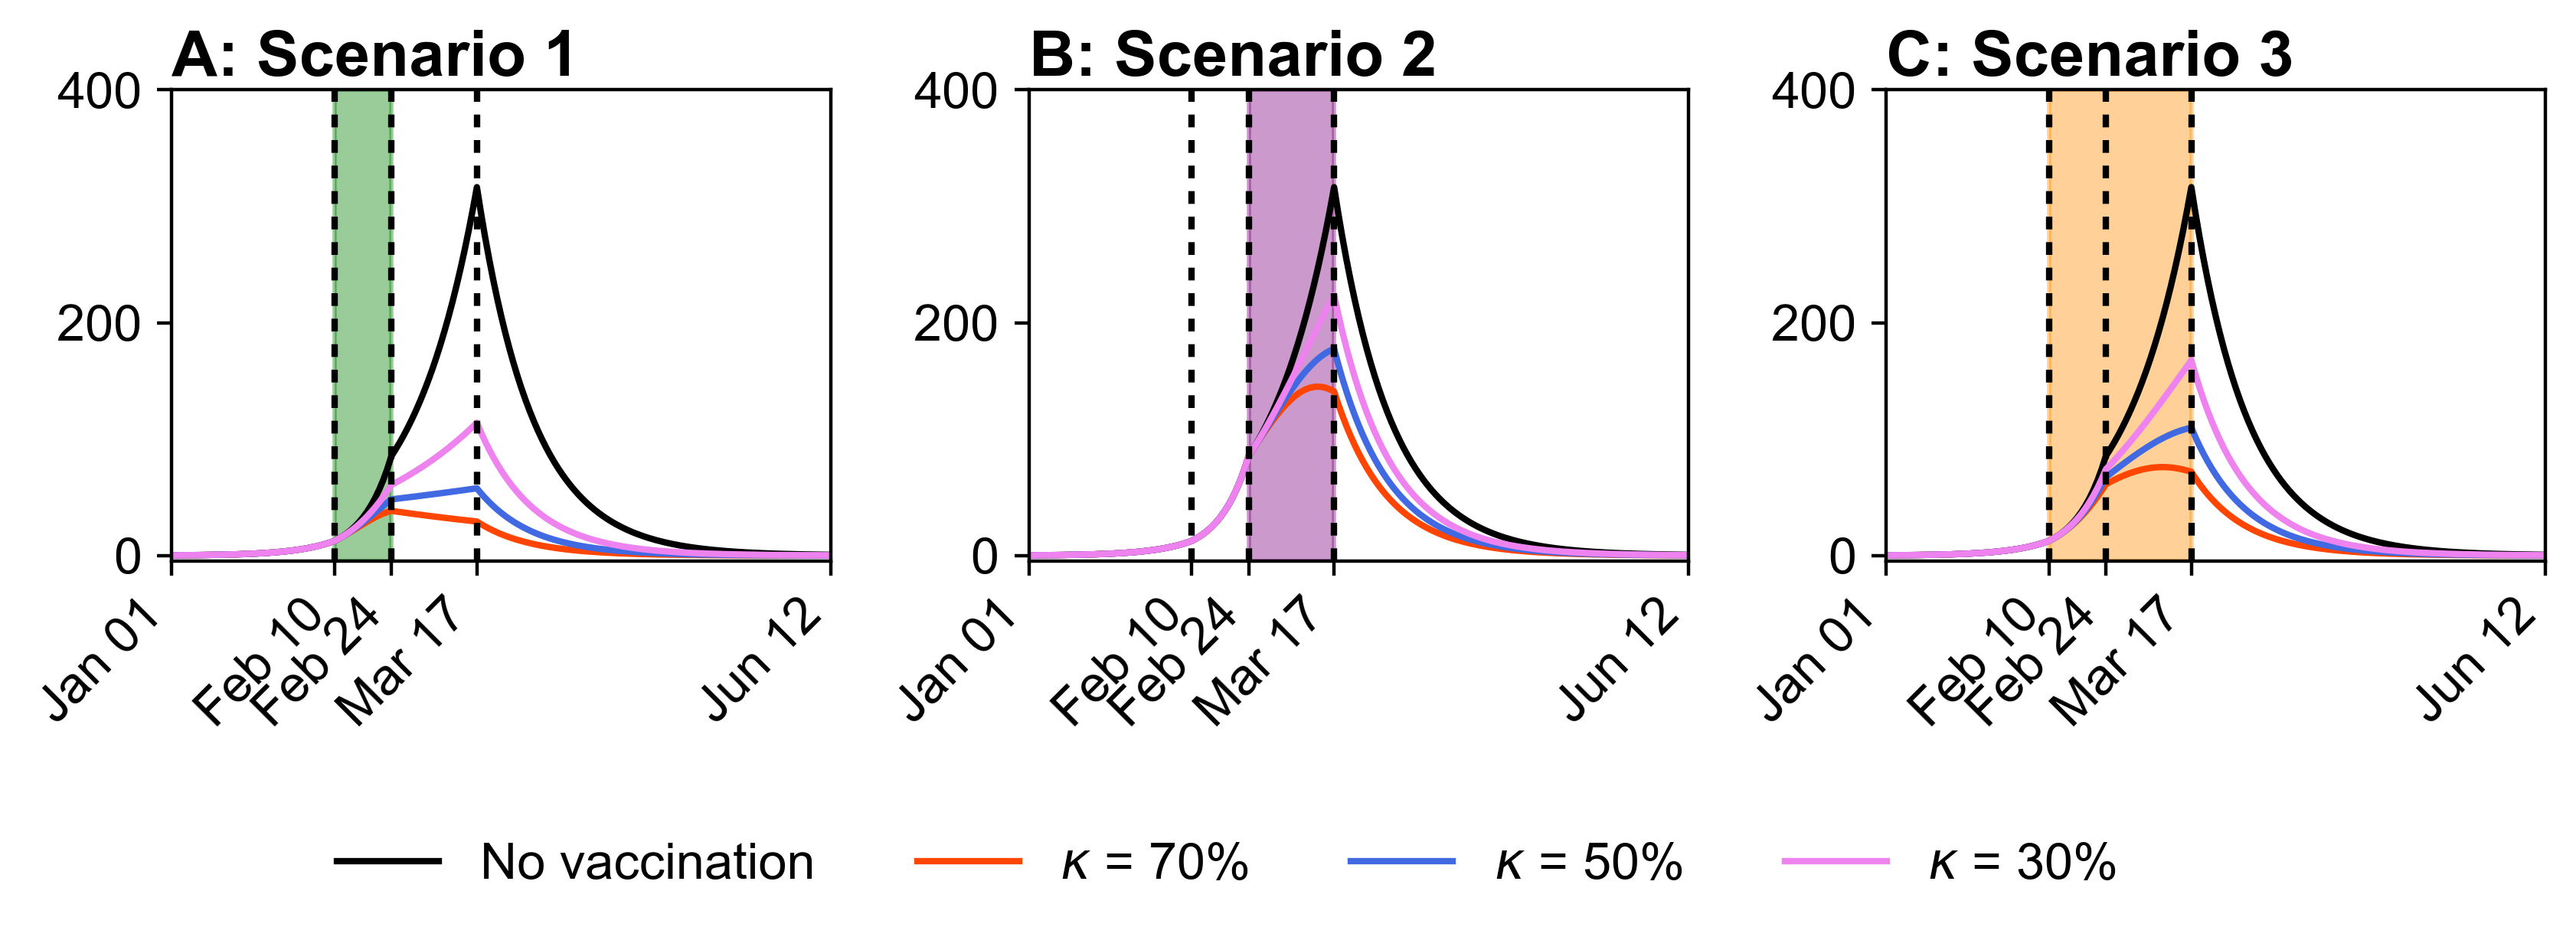

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(10, 2), dpi=set_dpi)


plot_scenario(sc1, ax[0], colors, 'sc1')
ax[0].text(0, 1.03, '{}: Scenario 1'.format(string.ascii_uppercase[0]), transform=ax[0].transAxes, weight='bold', size=15)
ax[0].fill_between(x=[pd.to_datetime('2015-02-10'), pd.to_datetime('2015-02-24')], y1=[-5, -5], y2=[400, 400], color=sc_colors[0], alpha=alpha)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plot_scenario(sc2, ax[1], colors, 'sc2')
ax[1].text(0, 1.03, '{}: Scenario 2'.format(string.ascii_uppercase[1]), transform=ax[1].transAxes, weight='bold', size=15)
ax[1].fill_between(x=[pd.to_datetime('2015-02-24'), pd.to_datetime('2015-03-17')], y1=[-5, -5], y2=[400, 400], color=sc_colors[1], alpha=alpha)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plot_scenario(sc3, ax[2], colors, 'sc3')
ax[2].text(0, 1.03, '{}: Scenario 3'.format(string.ascii_uppercase[2]), transform=ax[2].transAxes, weight='bold', size=15)
ax[2].fill_between(x=[pd.to_datetime('2015-02-10'), pd.to_datetime('2015-03-17')], y1=[-5, -5], y2=[400, 400], color=sc_colors[2], alpha=alpha)
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.legend(loc='upper center', bbox_to_anchor=(-1, -0.5), ncol=4, fontsize=alphsize, frameon=False)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

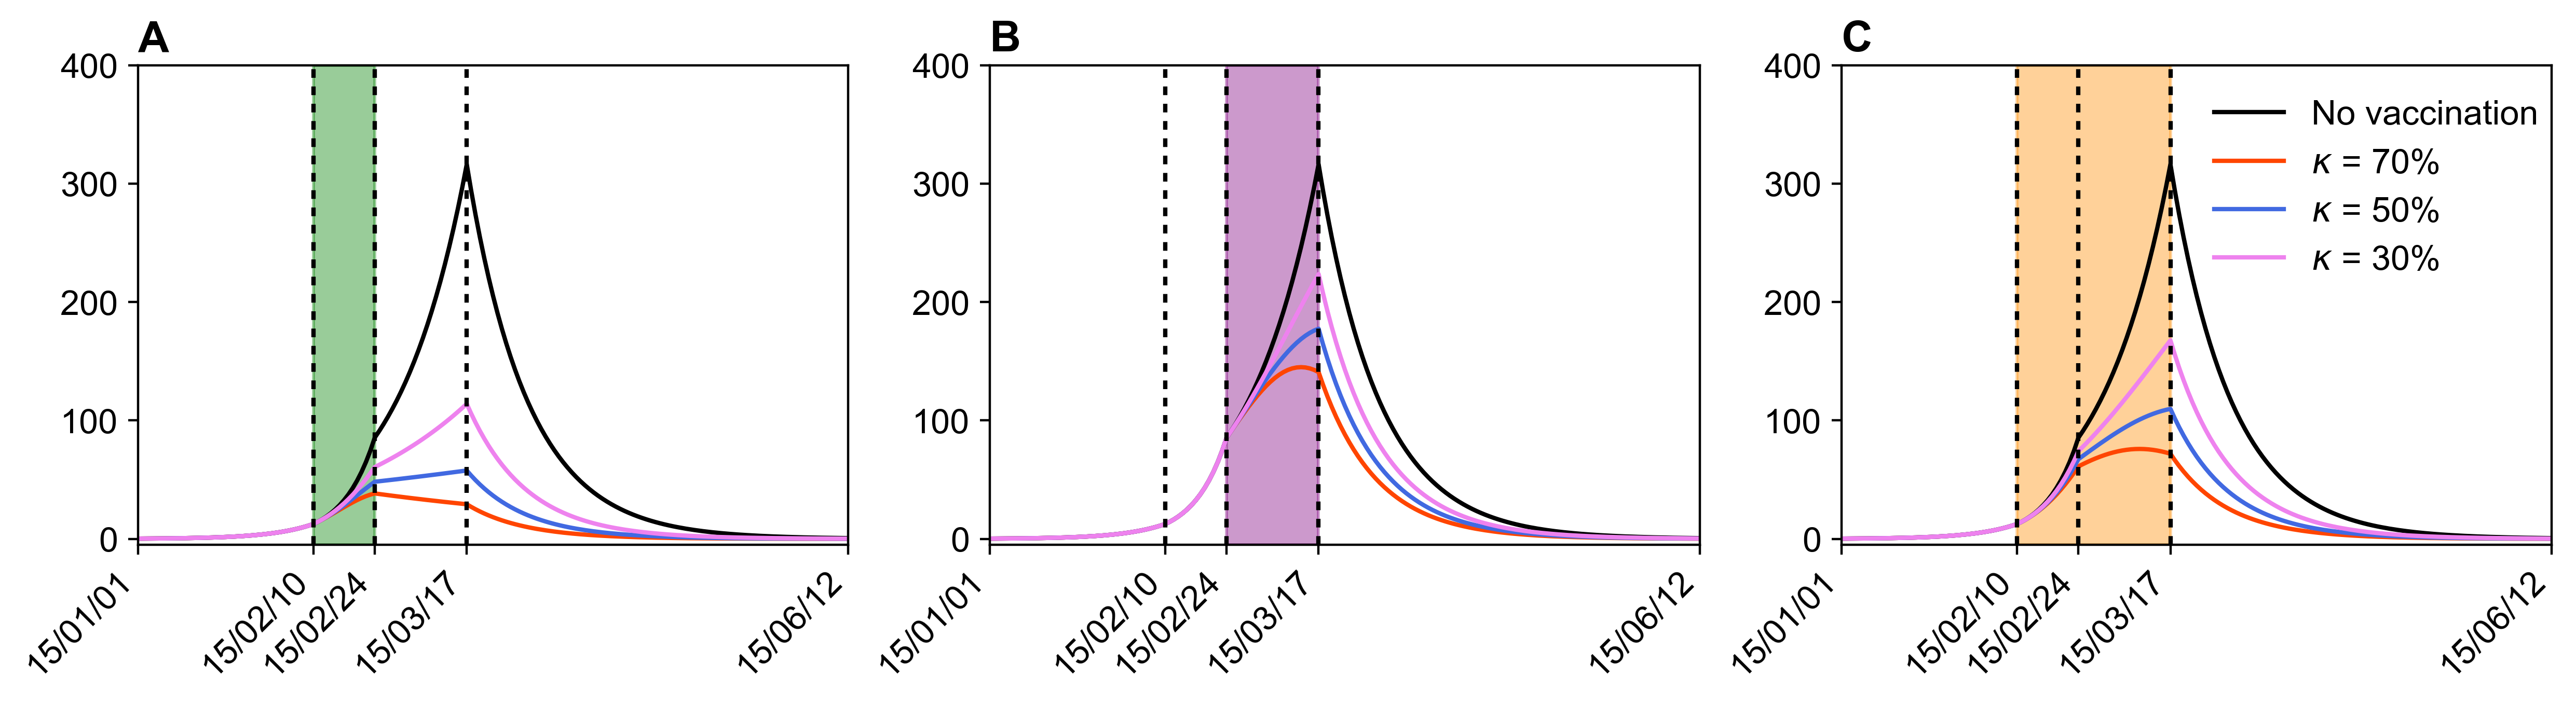

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3), dpi=set_dpi)

colors = ['orangered','royalblue','violet']
sc_colors = ['green','purple','darkorange']
plot_scenario(sc1, ax[0], colors, 'sc1')
ax[0].text(0, 1.03, '{}'.format(string.ascii_uppercase[0]), transform=ax[0].transAxes, weight='bold', size=15)
ax[0].fill_between(x=[pd.to_datetime('2015-02-10'), pd.to_datetime('2015-02-24')], y1=[-5, -5], y2=[400, 400], color=sc_colors[0], alpha=alpha)

plot_scenario(sc2, ax[1], colors, 'sc2')
ax[1].text(0, 1.03, '{}'.format(string.ascii_uppercase[1]), transform=ax[1].transAxes, weight='bold', size=15)
ax[1].fill_between(x=[pd.to_datetime('2015-02-24'), pd.to_datetime('2015-03-17')], y1=[-5, -5], y2=[400, 400], color=sc_colors[1], alpha=alpha)

plot_scenario(sc3, ax[2], colors, 'sc3')
ax[2].text(0, 1.03, '{}'.format(string.ascii_uppercase[2]), transform=ax[2].transAxes, weight='bold', size=15)
ax[2].fill_between(x=[pd.to_datetime('2015-02-10'), pd.to_datetime('2015-03-17')], y1=[-5, -5], y2=[400, 400], color=sc_colors[2], alpha=alpha)

plt.legend(loc='upper right', fontsize=alphsize, frameon=False, bbox_to_anchor=(1.03, 1.0), borderpad=0.5)
plt.show()

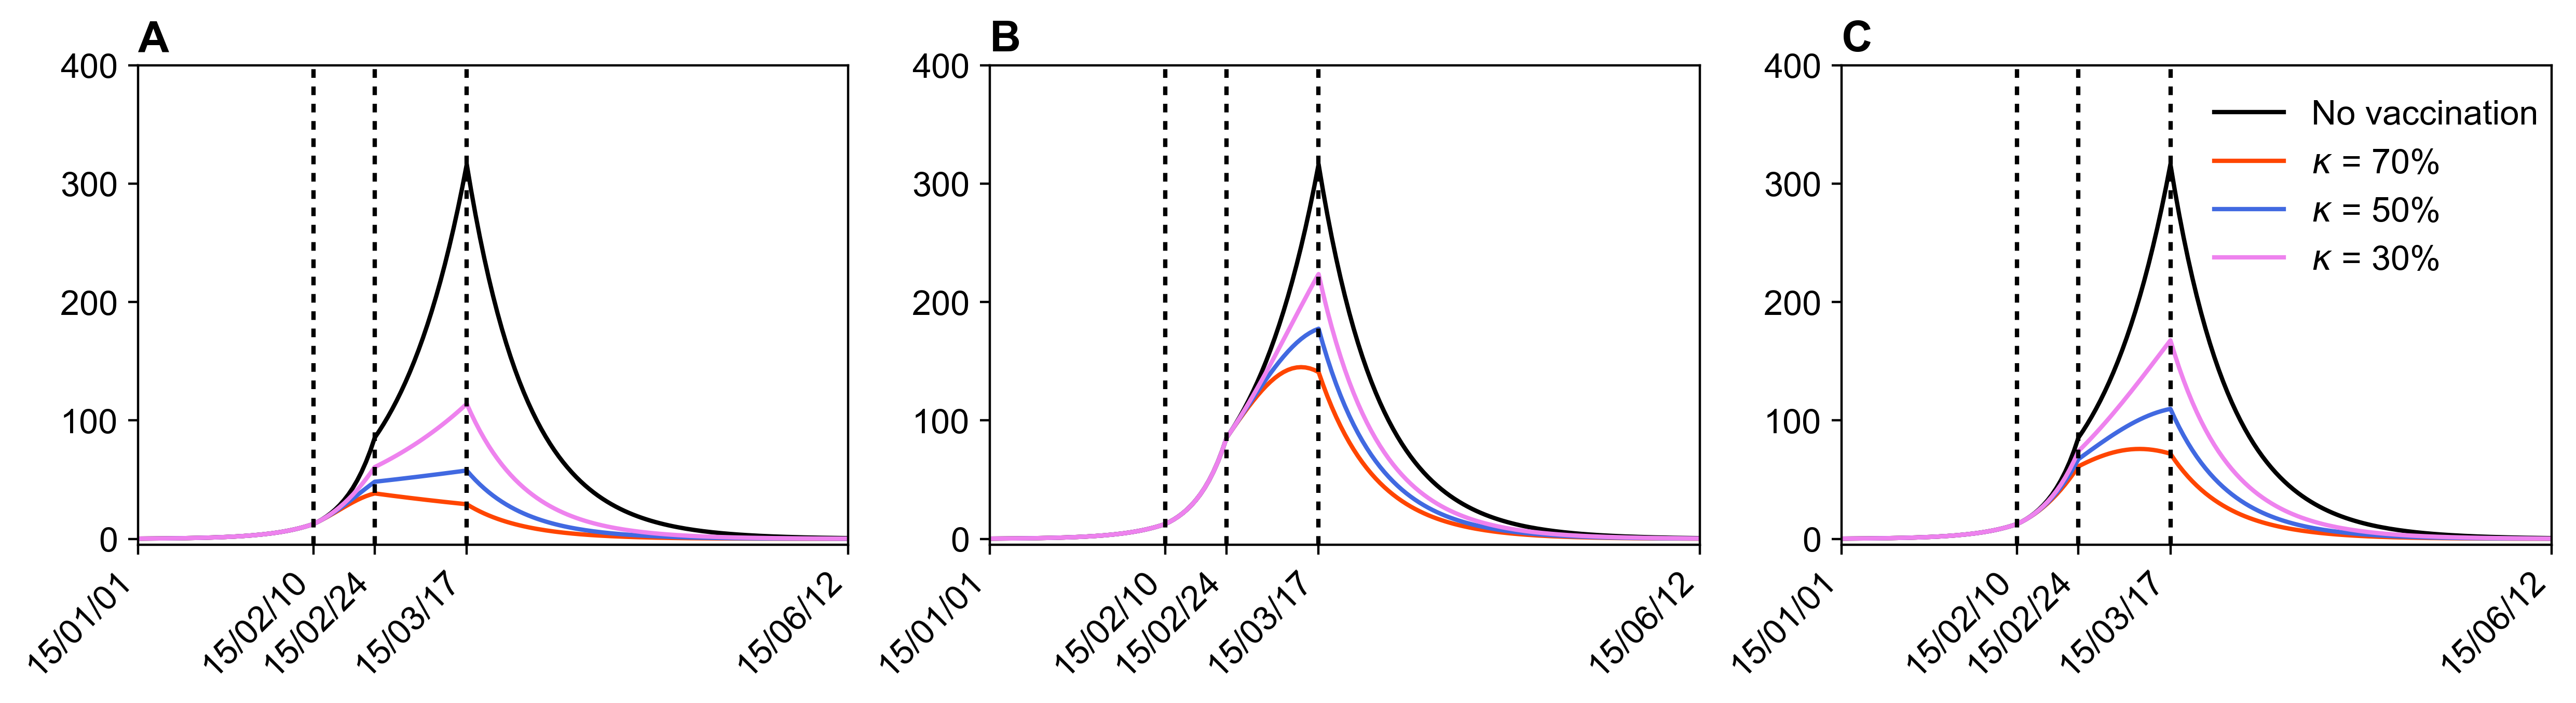

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3), dpi=set_dpi)

colors = ['orangered','royalblue','violet']
plot_scenario(sc1, ax[0], colors, 'sc1')
ax[0].text(0, 1.03, '{}'.format(string.ascii_uppercase[0]), transform=ax[0].transAxes, weight='bold', size=15)
plot_scenario(sc2, ax[1], colors, 'sc2')
ax[1].text(0, 1.03, '{}'.format(string.ascii_uppercase[1]), transform=ax[1].transAxes, weight='bold', size=15)
plot_scenario(sc3, ax[2], colors, 'sc3')
ax[2].text(0, 1.03, '{}'.format(string.ascii_uppercase[2]), transform=ax[2].transAxes, weight='bold', size=15)

plt.legend(loc='upper right', fontsize=alphsize, frameon=False, bbox_to_anchor=(1.03, 1.0), borderpad=0.5)
plt.show()